# ML03-로지스틱 회귀

이 노트북은 다음 문서의 내용을 실습하기 위하여 작성하였습니다.

* [ML03-로지스틱 회귀](https://trvoid.github.io/ml/ml03-logistic-regression/)

In [228]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터 세트

이해를 돕기 위하여 두 종류의 데이터 세트를 준비하고 결과를 비교해 봅니다.

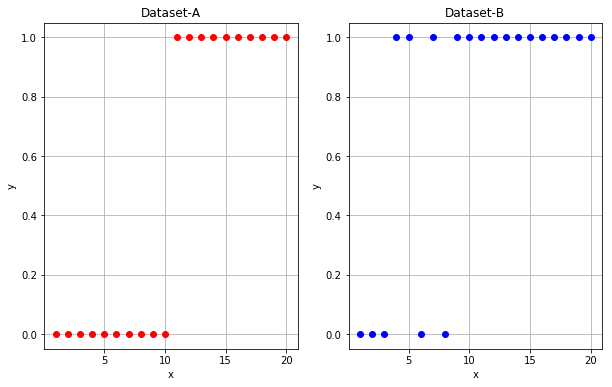

In [248]:
a_x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
a_y = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]

b_x = a_x
b_y = [0,0,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1]

plt.figure(1)
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.plot(a_x, a_y, 'ro')
plt.title('Dataset-A')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.subplot(122)
plt.plot(b_x, b_y, 'bo')
plt.title('Dataset-B')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

## Odds Ratio

실패할 확률 대비 성공할 확률의 비율을 odds ratio라고 합니다. p가 $0 \sim 1$ 범위에서 증가함에 따라 p의 odds는 $0 \sim \infty$ 범위에서 증가합니다.

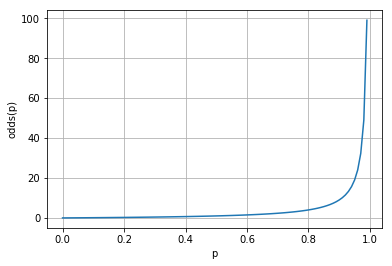

In [249]:
def odds(p):
    return p / (1 - p)

p = np.arange(0, 1, 0.01)
y = odds(p)

plt.plot(p, y)
plt.xlabel('p')
plt.ylabel('odds(p)')
plt.grid(True)
plt.show()

## Log Odds

Odds에 log를 적용하면 값의 범위가 $0 \sim \infty$에서 $-\infty \sim \infty$로 확장됩니다.

## 로지스틱 함수

로지스틱 함수의 파라미터 값에 따라 그래프가 어떻게 바뀌는지 살펴 봅니다.

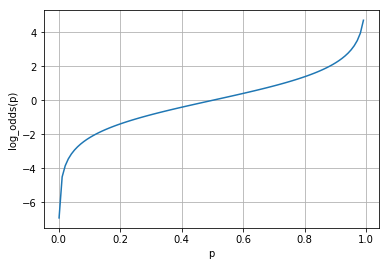

In [255]:
def log_odds(p):
    return np.log(p / (1 - p))

p = np.arange(0.001, 1.0, 0.01)
y = log_odds(p)

plt.plot(p, y)
plt.xlabel('p')
plt.ylabel('log_odds(p)')
plt.grid(True)
plt.show()

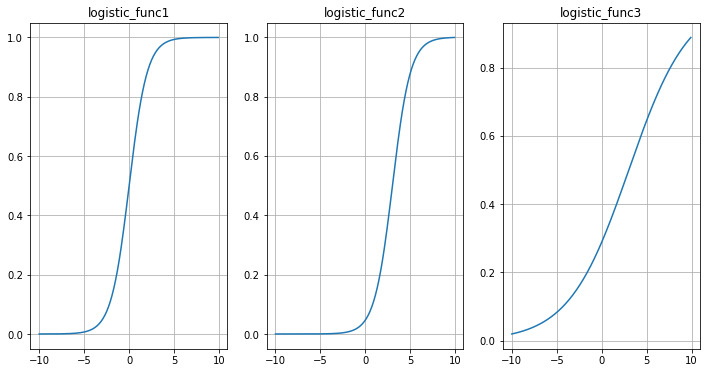

In [256]:
def logistic_func1(x):
    return 1 / (1 + np.exp(-x))

def logistic_func2(x):
    return 1 / (1 + np.exp(-(x-3)))

def logistic_func3(x):
    return 1 / (1 + np.exp(-0.3*(x-3)))

x = np.arange(-10, 10, 0.1)
y1 = logistic_func1(x)
y2 = logistic_func2(x)
y3 = logistic_func3(x)

plt.figure(figsize=(12,6))

plt.subplot(131)
plt.plot(x, y1)
plt.title('logistic_func1')
plt.grid(True)

plt.subplot(132)
plt.plot(x, y2)
plt.title('logistic_func2')
plt.grid(True)

plt.subplot(133)
plt.plot(x, y3)
plt.title('logistic_func3')
plt.grid(True)

plt.show()

## 비용 함수

### 첫번째 시도

아래의 비용 함수를 사용하면 비용이 선형으로 증가하거나 감소합니다.

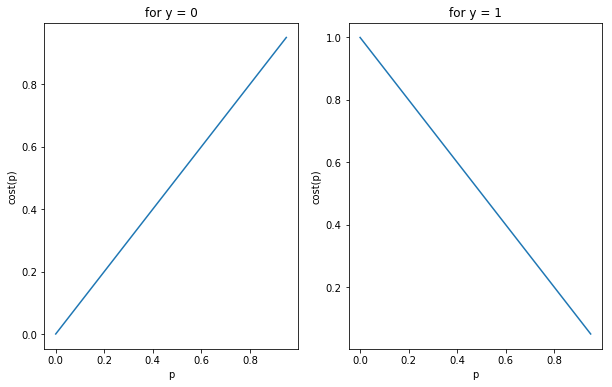

In [233]:
def cost(p, y):
    if y == 0:
        return p
    else:
        return (1 - p)
    
p = np.arange(0, 1, 0.05)
cost1 = cost(p, 0)
cost2 = cost(p, 1)

plt.figure(figsize=(10,6))

plt.subplot(121)
plt.plot(p, cost1)
plt.xlabel('p')
plt.ylabel('cost(p)')
plt.title('for y = 0')

plt.subplot(122)
plt.plot(p, cost2)
plt.xlabel('p')
plt.ylabel('cost(p)')
plt.title('for y = 1')

plt.show()

### 두번째 시도

아래의 비용 함수를 사용하면 가능도가 참값에서 멀어질때 비용이 매우 빠른 속도로 증가합니다.

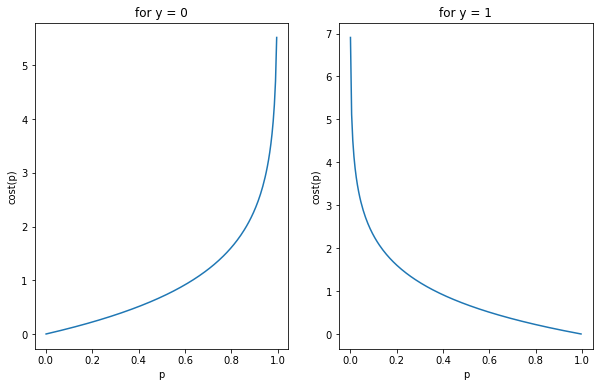

In [234]:
def cost(p, y):
    if y == 0:
        return -np.log(1-p)
    else:
        return -np.log(p)
    
p = np.arange(0.001, 1, 0.005)
cost1 = cost(p, 0)
cost2 = cost(p, 1)

plt.figure(figsize=(10,6))

plt.subplot(121)
plt.plot(p, cost1)
plt.xlabel('p')
plt.ylabel('cost(p)')
plt.title('for y = 0')

plt.subplot(122)
plt.plot(p, cost2)
plt.xlabel('p')
plt.ylabel('cost(p)')
plt.title('for y = 1')

plt.show()

## Hypothesis의 파라미터 찾기

주어진 데이터 세트에 대하여 비용 함수가 최소값을 가지도록 하는 hypothesis의 파라미터를 찾습니다.

### 함수 정의

In [235]:
# Hypothesis function
def h(x, w):
    return 1 / (1 + np.exp(-np.dot(x, w.T)))

# Cost function
def cost(x, w, y):
    return - (1 - y) * np.log(1 - h(x, w)) - y * np.log(h(x, w))

# Total cost for a given data set
def J(x, w, y):
    z = cost(x, w, y)
    return np.sum(z) / z.size

# Test with a sample data set
x = np.ones((4,2))
x[:,1] = np.array([1, 2, 3, 4]).T
y = np.array([0, 0, 1, 1])
w = np.array([[1, 2]])

print('x:\n' + str(x))
print('w:\n' + str(w))
print('y:\n' + str(y))

print ('cost:\n' + str(cost(x, w, y)))
print('J:\n' + str(J(x, w, y)))

x:
[[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]]
w:
[[1 2]]
y:
[0 0 1 1]
cost:
[[  3.04858735e+00   3.04858735e+00   4.85873516e-02   4.85873516e-02]
 [  5.00671535e+00   5.00671535e+00   6.71534849e-03   6.71534849e-03]
 [  7.00091147e+00   7.00091147e+00   9.11466454e-04   9.11466454e-04]
 [  9.00012340e+00   9.00012340e+00   1.23402190e-04   1.23402190e-04]]
J:
3.01408439218


### 데이터 세트 준비

In [236]:
ds_a_x = np.ones((len(a_x), 2))
ds_a_x[:, 1] = np.array(a_x)
ds_a_y = np.array(a_y)

ds_b_x = np.ones((len(b_x), 2))
ds_b_x[:, 1] = np.array(b_x)
ds_b_y = np.array(b_y)

print('ds_a_x:\n' + str(ds_a_x))
print('ds_a_y:\n' + str(ds_a_y))
print('ds_b_x:\n' + str(ds_b_x))
print('ds_b_y:\n' + str(ds_b_y))


ds_a_x:
[[  1.   1.]
 [  1.   2.]
 [  1.   3.]
 [  1.   4.]
 [  1.   5.]
 [  1.   6.]
 [  1.   7.]
 [  1.   8.]
 [  1.   9.]
 [  1.  10.]
 [  1.  11.]
 [  1.  12.]
 [  1.  13.]
 [  1.  14.]
 [  1.  15.]
 [  1.  16.]
 [  1.  17.]
 [  1.  18.]
 [  1.  19.]
 [  1.  20.]]
ds_a_y:
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
ds_b_x:
[[  1.   1.]
 [  1.   2.]
 [  1.   3.]
 [  1.   4.]
 [  1.   5.]
 [  1.   6.]
 [  1.   7.]
 [  1.   8.]
 [  1.   9.]
 [  1.  10.]
 [  1.  11.]
 [  1.  12.]
 [  1.  13.]
 [  1.  14.]
 [  1.  15.]
 [  1.  16.]
 [  1.  17.]
 [  1.  18.]
 [  1.  19.]
 [  1.  20.]]
ds_b_y:
[0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


### 직접 파라미터 조정하면서 찾기

파라미터의 초기값을 정하고 상하좌우 네 방향으로 파라미터를 일정값만큼 변화시키면서 비용이 가장 많이 줄어드는 방향을 찾습니다. 그리고 그 지점에서 다시 이 과정을 수행합니다.

In [237]:
w = np.array([0.1, 0.1])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))
w = np.array([0.15, 0.1])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))
w = np.array([0.1, 0.15])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))
w = np.array([0.05, 0.1])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))
w = np.array([0.1, 0.05])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))

J:
0.630286609275
J:
0.642741204692
J:
0.684781270027
J:
0.618279826931
J:
0.62559691252


In [238]:
w = np.array([0.05, 0.1])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))
w = np.array([0.1, 0.1])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))
w = np.array([0.05, 0.15])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))
w = np.array([0.00, 0.1])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))
w = np.array([0.05, 0.05])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))

J:
0.618279826931
J:
0.630286609275
J:
0.669428324177
J:
0.606730466119
J:
0.618449979267


In [239]:
w = np.array([0.00, 0.1])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))
w = np.array([0.05, 0.1])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))
w = np.array([0.00, 0.15])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))
w = np.array([-0.05, 0.1])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))
w = np.array([0.00, 0.05])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))

J:
0.606730466119
J:
0.618279826931
J:
0.654430977048
J:
0.595647936771
J:
0.611870037687


In [240]:
w = np.array([0.00, 0.15])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))
w = np.array([0.05, 0.15])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))
w = np.array([0.00, 0.2])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))
w = np.array([-0.05, 0.15])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))
w = np.array([0.00, 0.1])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))

J:
0.654430977048
J:
0.669428324177
J:
0.734585402408
J:
0.639797904634
J:
0.606730466119


In [241]:
w = np.array([-0.05, 0.15])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))
w = np.array([0.0, 0.15])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))
w = np.array([-0.05, 0.2])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))
w = np.array([-0.1, 0.15])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))
w = np.array([-0.05, 0.1])
print('J:\n' + str(J(ds_a_x, w, ds_a_y)))

J:
0.639797904634
J:
0.654430977048
J:
0.717574602734
J:
0.62553772231
J:
0.595647936771


이와 같은 방식을 J가 더 이상 줄어들지 않을 때까지 반복하고 그 때의 w 값을 선택합니다.

### Gradient descent 방식으로 찾기

In [242]:
# Partial derivative of J(w)
def derivative_of_J(x, w, y):
    diff = np.reshape(h(x, w) - y, (y.size, 1))
    return np.sum(diff * x, axis=0) / y.size

# Repeat gradient_descent up to the given ic times.
def repeat_gradient_descent(x, y, lr, rc, initial_w):
  w = np.zeros(initial_w.shape)
  dtotal_cost = np.ones(initial_w.shape)

  for i in range(rc):
    if i == 0:
      w = initial_w
    else:
      w = w - lr * dtotal_cost

    dtotal_cost = derivative_of_J(x, w, y)
    total_cost = J(x, w, y)
  
    if i % 100 == 0:
      print(str(i) + ', w: ' + str(w) + ',  total_cost: ' + str(total_cost))
    
  print(str(i) + ', w: ' + str(w) + ',  total_cost: ' + str(total_cost))  

  return w

두 종류의 데이터 세트에 대하여 비용 함수의 값을 최소값이 되도록 하는 hypothesis의 파라미터를 찾고 그래프로 그려 봅니다.

0, w: [ 1.  1.],  total_cost: 3.26021492096
100, w: [-2.6355604   0.42721842],  total_cost: 0.381607976117
200, w: [-4.20800179  0.33990582],  total_cost: 0.259597699813
300, w: [-5.11107361  0.44791876],  total_cost: 0.189260375224
400, w: [-5.67752132  0.55875972],  total_cost: 0.14696429209
500, w: [-6.12954266  0.60842371],  total_cost: 0.136285798335
600, w: [-6.52973682  0.64520282],  total_cost: 0.128206376451
700, w: [-6.89004447  0.67842379],  total_cost: 0.121658132782
800, w: [-7.21891096  0.70882576],  total_cost: 0.116203273473
900, w: [-7.52228277  0.7369322 ],  total_cost: 0.111561580443
999, w: [-7.80178475  0.76287476],  total_cost: 0.107581904528
0, w: [ 1.  1.],  total_cost: 1.26021492096
100, w: [-1.28554202  0.32823582],  total_cost: 0.305950256446
200, w: [-2.03450316  0.42156667],  total_cost: 0.285936892902
300, w: [-2.3862255   0.46758369],  total_cost: 0.281598132252
400, w: [-2.57198045  0.49243347],  total_cost: 0.280395854669
500, w: [-2.67574608  0.5064661

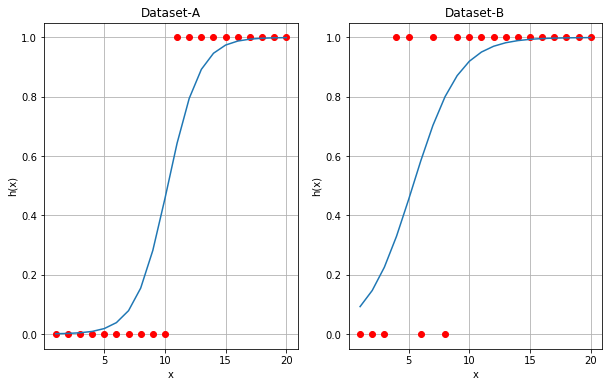

In [246]:
# Repeat count
rc = 1000

# Initial parameters
initial_w = np.array([1.0, 1.0])

plt.figure(figsize=(10,6))

##### For Dataset-A

# Learning rate
lr = 0.2

ds_a_w = repeat_gradient_descent(ds_a_x, ds_a_y, lr, rc, initial_w)

plt.subplot(121)
plt.plot(a_x, a_y, 'ro')
plt.plot(a_x, h(ds_a_x, ds_a_w))
plt.title('Dataset-A')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.grid(True)

##### For DS-B

# Learning rate
lr = 0.3

ds_b_w = repeat_gradient_descent(ds_b_x, ds_b_y, lr, rc, initial_w)

plt.subplot(122)
plt.plot(b_x, b_y, 'ro')
plt.plot(b_x, h(ds_b_x, ds_b_w))
plt.title('Dataset-B')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.grid(True)

plt.show()

Dataset-A와 비교하여 Dataset-B에서 x의 임계점은 왼쪽으로 치우쳐 있고 경사도는 완만하다. y값이 0인 데이터와 1인 데이터의 x값이 서로 겹치는 범위가 넓으면 경사도가 완만하게 나타납니다.